In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import RobustScaler
from scipy.stats import mstats
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Data Loading and Reconstruction for use

In [3]:
df = pd.read_csv(r'C:\Users\Preetham S Gowda\Desktop\Algo Trading\Market Research\Factor Investing\combined_data_monthly_formatted.csv')
df.head()

,Date,factor,A,AAPL,ABNB,ACGL,ACN,ADBE,ADSK,AJG,ALGN,ALNY,AMAT,AMD,AME,AMP,AMZN,ANET,ANSS,AON,APH,APP,APTV,ARES,AXON,AZO,BA,BKNG,BMRN,BR,BSX,BSY,BURL,CDNS,CDW,CE,CEG,CELH,CFLT,CHD,CL,CMG,COIN,COST,CPRT,CRM,CRWD,CSGP,CTAS,CTLT,DASH,DAY,DDOG,DECK,DELL,DKNG,DOCU,DPZ,DT,DVA,DVN,DXCM,ECL,EFX,EL,EME,ENPH,ENTG,EPAM,EQH,ERIE,ETN,ETSY,EW,EXAS,EXPE,FANG,FCX,FDS,FICO,FTNT,FWONK,GDDY,GE,GEHC,GGG,GOOG,GOOGL,GWW,H,HEI,HEI-A,HES,HLT,HOOD,HUBB,HUBS,HWM,IDXX,IEX,ILMN,INCY,INTU,IOT,IQV,IR,ISRG,IT,JKHY,KEYS,KKR,KLAC,LII,LIN,LLY,LNG,LPLA,LRCX,LSCC,LULU,LW,LYV,MA,MANH,MAR,MCK,MCO,MDB,MELI,META,MLM,MMC,MNST,MOH,MPWR,MRK,MRNA,MRVL,MSCI,MSFT,MSI,MSTR,MTCH,MTD,NBIX,NDSN,NET,NFLX,NOW,NVDA,ODFL,OKTA,ORLY,OTIS,PANW,PATH,PAYC,PCTY,PGR,PINS,PLTR,PODD,POOL,PSTG,PTC,PWR,RBLX,RCL,REGN,RGEN,ROKU,ROL,RSG,SBAC,SHW,SMCI,SNAP,SNOW,SNPS,SPGI,SQ,STLD,STX,SYK,TDG,TEAM,TECH,TER,TMO,TMUS,TOST,TPL,TRGP,TSCO,TSLA,TT,TTD,TW,TYL,U,UBER,UNP,V,VEEV,VLTO,VMC,VRSK,VRSN,VRT,VRTX,WAT,WBD,WCN,WDAY,WM,WMT,WSM,WST,WYNN,YUM,ZBRA,ZS,ZTS
0,2020-01-01,ACCA,-2.098265e-02,-7.182421e-02,NaN,-3.421685e-02,-8.380342e-02,-1.923077e-02,-1.942939e-01,-4.425607e-02,2.305977e-01,-7.141639e-02,-8.276294e-03,1.583352e-01,-3.944404e-02,-1.862156e-02,-1.392705e-01,-2.121940e-02,-1.909288e-02,-2.534720e-02,-3.152353e-02,NaN,2.231480e-02,3.809093e-02,-2.911248e-02,-6.843766e-02,4.252117e-02,-1.188626e-03,1.314400e-01,NaN,-5.166196e-02,NaN,NaN,-7.954824e-02,-5.626719e-02,5.930883e-02,NaN,3.906626e-02,NaN,-2.756760e-02,-6.432161e-02,-5.149362e-02,NaN,-8.746130e-02,NaN,NaN,NaN,-3.744935e-02,NaN,NaN,NaN,3.909689e-03,-7.069728e-02,NaN,NaN,-3.017094e-01,NaN,-6.476523e-02,NaN,-7.095299e-02,-4.180791e-01,4.195315e-03,-1.625786e-01,-4.433093e-02,NaN,-1.329866e-01,-6.861000e-02,-5.199479e-02,-7.983113e-02,-2.131468e-03,-2.328208e-02,-4.820261e-02,-1.371227e-01,-3.190504e-02,-1.949379e-01,6.538256e-02,-3.765821e-01,-5.737472e-02,-6.379129e-02,-8.000361e-02,-1.471628e-01,-4.083639e-02,-1.958215e-01,1.826229e-02,NaN,-3.197933e-02,-7.776519e-02,-7.776519e-02,-6.799047e-02,-1.007777e-02,-2.681757e-02,-2.681757e-02,-2.351629e-01,-8.492987e-02,NaN,-4.949755e-02,-8.814584e-02,2.202220e-02,-2.888875e-02,-4.338075e-02,-5.589980e-02,-4.804885e-02,NaN,NaN,-6.839277e-02,-4.276836e-02,-3.798046e-02,-8.700600e-02,NaN,-5.389305e-02,9.969366e-02,NaN,-1.260025e-01,-5.585465e-02,-6.559718e-03,-3.781830e-02,-4.810388e-02,NaN,-6.513329e-02,NaN,NaN,-6.054667e-02,-2.420796e-02,-1.152635e-01,-7.716287e-02,NaN,-2.965589e-02,NaN,-1.812657e-01,-6.026388e-02,-3.110351e-02,-4.133257e-02,7.324372e-03,-1.285145e-01,-8.558442e-02,-6.005154e-03,-3.780837e-01,NaN,-4.984630e-02,NaN,-6.105186e-02,-4.171841e-02,-2.055580e-01,-4.333199e-02,1.030726e-01,-6.881787e-02,-7.405275e-02,8.511073e-03,-1.912794e-01,NaN,-5.958287e-02,NaN,-9.350129e-02,NaN,NaN,NaN,-3.211535e-02,NaN,-1.873685e-02,-6.022283e-02,NaN,-4.121950e-02,-1.772922e-02,NaN,-3.048211e-02,-7.982368e-02,NaN,-6.363151e-02,5.215198e-02,-1.418371e-03,-7.297773e-02,-9.156997e-02,-6.419732e-02,-1.203240e-01,-6.755353e-02,5.975151e-02,-1.546891e-01,NaN,-4.071774e-02,-9.795007e-02,4.052363e-03,-4.707863e-02,NaN,-4.887853e-02,-2.794238e-02,NaN,NaN,-2.321467e-02,-2.771824e-02,-2.785744e-02,NaN,-5.420942e-02,-2.077641e-01,-9.157985e-02,-1.001381e-01,-5.019084e-02,-5.910421e-02,-4.875798e-02,-6.146995e-02,NaN,-1.209852e-01,-5.113946e-02,5.264524e-03,NaN,NaN,-4.157647e-02,-4.701262e-02,4.793962e-02,-1.056802e-01,-4.610358e-02,-9.469844e-02,-4.459178e-02,-8.603578e-02,NaN,-6.498552e-02,NaN,NaN,-4.520724e-02,-7.172693e-02,-6.852358e-02,-8.520930e-02,NaN,-3.585862e-02
1,2020-01-01,ATR14,2.205727e+00,1.977781e+00,NaN,1.975959e+00,2.095281e+00,2.199852e+00,2.343281e+00,2.401221e+00,3.032257e+00,3.166436e+00,2.993078e+00,2.992114e+00,2.754686e+00,2.782661e+00,2.715111e+00,2.715533e+00,2.923501e+00,3.083671e+00,2.910670e+00,NaN,2.669649e+00,2.476880e+00,2.577969e+00,3.297255e+00,3.579398e+00,5.661849e+00,5.709808e+00,5.748107e+00,5.610590e+00,NaN,5.790097e+00,5.798042e+00,5.658892e+00,5.604334e+00,NaN,5.58192

In [4]:
id_vars = ['Date', 'factor']
value_vars = [col for col in df.columns if col not in id_vars]
df_long = pd.melt(df, id_vars=id_vars, value_vars=value_vars, 
                  var_name='ticker', value_name='value')

# Pivot to get factors as columns
df = df_long.pivot_table(index=['Date', 'ticker'], columns='factor', values='value').reset_index()
df.columns.name = None  # Remove pivot table column name

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Assumptions and First look

-> By the face of the data, it naturally looks like a financial data derived from financial statement and OHLC data.

-> Nxt_Month_Return is the target, it is crude and has to be engineered further

-> All the variables need cleaning, analysis and engineering

# Null Values and Null Value Treatment

In [5]:
null_pct = (df.isnull().sum() / len(df) * 100).round(2)
null_pct[(null_pct.values>0)]

ACCA                                        4.23
DECM                                       55.58
EBIT                                        4.23
GMI                                        30.28
PEG                                        28.18
beta                                       78.19
book_to_price_ratio                         4.23
cash_flow_to_price_ratio                    4.23
cashflow_per_share_ttm                      4.23
eps_ttm                                     4.23
monthly_return                              2.14
net_asset_growth_rate                      28.18
net_asset_per_share                         4.23
net_operate_cash_flow_per_share             4.23
net_operate_cashflow_growth_rate           28.18
net_profit_growth_rate                     28.18
net_profit_to_total_operate_revenue_ttm     4.23
net_profit_ttm                              4.23
next_mth_return                             2.14
operating_revenue_growth_rate              28.18
retained_earnings_pe

In [6]:
#  As there are null values in more than 50% of the 'DECM' and 'beta' factor, I have decided to drop it.
df.drop(['DECM'],axis=1 ,inplace=True)
df.drop(['beta'],axis=1 ,inplace=True)


In [7]:
null_pct = (df.isnull().sum() / len(df) * 100).round(2)
null_pct[(null_pct.values>20)]

GMI                                 30.28
PEG                                 28.18
net_asset_growth_rate               28.18
net_operate_cashflow_growth_rate    28.18
net_profit_growth_rate              28.18
operating_revenue_growth_rate       28.18
dtype: float64

In [8]:
# Null percentages by ticker and date
ticker_nulls = df.groupby('ticker').apply(lambda x: x.isna().sum() )
date_nulls = df.groupby('Date').apply(lambda x: x.isna().sum() )

C:\Users\Preetham S Gowda\AppData\Local\Temp\ipykernel_32476\653879477.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ticker_nulls = df.groupby('ticker').apply(lambda x: x.isna().sum() )
C:\Users\Preetham S Gowda\AppData\Local\Temp\ipykernel_32476\653879477.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  date_nulls = df.groupby('Date').apply(lambda x: x.isna().sum() )


In [9]:
high_null_cols = ['GMI', 'PEG', 'net_asset_growth_rate', 
                  'net_operate_cashflow_growth_rate', 'net_profit_growth_rate', 'operating_revenue_growth_rate']
for col in high_null_cols:
    print(f"\nTickers with null {col}:")
    print(df[df[col].isna()]['ticker'].value_counts())


Tickers with null GMI:
ticker
ACGL    48
BKNG    48
EQH     48
ERIE    48
PGR     48
        ..
U        4
BSY      4
ABNB     1
DASH     1
IOT      1
Name: count, Length: 212, dtype: int64

Tickers with null PEG:
ticker
EL      24
NVDA    24
PANW    24
MRVL    24
BR      24
        ..
U        4
BSY      4
ABNB     1
DASH     1
IOT      1
Name: count, Length: 212, dtype: int64

Tickers with null net_asset_growth_rate:
ticker
EL      24
NVDA    24
PANW    24
MRVL    24
BR      24
        ..
U        4
BSY      4
ABNB     1
DASH     1
IOT      1
Name: count, Length: 212, dtype: int64

Tickers with null net_operate_cashflow_growth_rate:
ticker
EL      24
NVDA    24
PANW    24
MRVL    24
BR      24
        ..
U        4
BSY      4
ABNB     1
DASH     1
IOT      1
Name: count, Length: 212, dtype: int64

Tickers with null net_profit_growth_rate:
ticker
EL      24
NVDA    24
PANW    24
MRVL    24
BR      24
        ..
U        4
BSY      4
ABNB     1
DASH     1
IOT      1
Name: count, Lengt

## Null value Treatment
High-Null Tickers (≥40 Nulls) -> Drop these tickers

Moderate-Null Tickers (10–39 Nulls) -> consistent for companies like NVDA,PANW, etc, so replace them with global medians/means

Low-Null Tickers -> Impute using ticker-specific forward-fill

In [10]:
df.columns

Index(['Date', 'ticker', 'ACCA', 'ATR14', 'DAVOL20', 'EBIT', 'GMI',
       'Kurtosis20', 'MAC20', 'MFI14', 'PEG', 'PLRC12', 'Price1M', 'ROC20',
       'Skewness20', 'TRIX10', 'VMACD', 'VOL20', 'VOSC', 'Variance20',
       'Volume1M', 'boll_down', 'boll_up', 'book_to_price_ratio',
       'cash_flow_to_price_ratio', 'cashflow_per_share_ttm', 'eps_ttm',
       'growth', 'liquidity', 'market_cap', 'momentum', 'monthly_return',
       'net_asset_growth_rate', 'net_asset_per_share',
       'net_operate_cash_flow_per_share', 'net_operate_cashflow_growth_rate',
       'net_profit_growth_rate', 'net_profit_to_total_operate_revenue_ttm',
       'net_profit_ttm', 'next_mth_return', 'operating_revenue_growth_rate',
       'retained_earnings_per_share', 'roe_ttm', 'sharpe_ratio_20',
       'sharpe_ratio_60', 'size'],
      dtype='object')

In [11]:
factor_cols = ['ACCA', 'ATR14', 'DAVOL20', 'EBIT', 'GMI',
       'Kurtosis20', 'MAC20', 'MFI14', 'PEG', 'PLRC12', 'Price1M', 'ROC20',
       'Skewness20', 'TRIX10', 'VMACD', 'VOL20', 'VOSC', 'Variance20',
       'Volume1M', 'boll_down', 'boll_up', 'book_to_price_ratio',
       'cash_flow_to_price_ratio', 'cashflow_per_share_ttm', 'eps_ttm',
       'growth', 'liquidity', 'market_cap', 'momentum', 'monthly_return',
       'net_asset_growth_rate', 'net_asset_per_share',
       'net_operate_cash_flow_per_share', 'net_operate_cashflow_growth_rate',
       'net_profit_growth_rate', 'net_profit_to_total_operate_revenue_ttm',
       'net_profit_ttm', 'operating_revenue_growth_rate',
       'retained_earnings_per_share', 'roe_ttm', 'sharpe_ratio_20',
       'sharpe_ratio_60', 'size']


In [12]:
# Drop tickers with ≥40 nulls for high-null columns
null_counts = df.groupby('ticker')[high_null_cols].apply(lambda x: x.isna().sum())
tickers_to_drop = null_counts[null_counts.max(axis=1) >= 40].index
df = df[~df['ticker'].isin(tickers_to_drop)]
print(f"Dropped tickers: {tickers_to_drop}")

# Impute moderate-null tickers (10–39 nulls) with global median
for col in high_null_cols:
    df[col] = df[col].fillna(df[col].median())
    
# Impute low-null tickers (<10 nulls) with forward-fill
for col in high_null_cols:
    df[col] = df.groupby('ticker')[col].fillna(method='ffill')

# Impute low-null columns (~4%) with median
low_null_cols = [col for col in factor_cols if col not in high_null_cols]
for col in low_null_cols:
    df[col] = df[col].fillna(df[col].median())

Dropped tickers: Index(['ACGL', 'AMP', 'BKNG', 'EQH', 'ERIE', 'PGR'], dtype='object', name='ticker')


C:\Users\Preetham S Gowda\AppData\Local\Temp\ipykernel_32476\3047816251.py:13: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df[col] = df.groupby('ticker')[col].fillna(method='ffill')
C:\Users\Preetham S Gowda\AppData\Local\Temp\ipykernel_32476\3047816251.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df.groupby('ticker')[col].fillna(method='ffill')
C:\Users\Preetham S Gowda\AppData\Local\Temp\ipykernel_32476\3047816251.py:13: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df[col] = df.groupby('ticker')[col].fillna(met

# Outlier Treament

We have three options to look at it

1)Global WInsorization -> at 5-95(capping the whole dataset with in this values)

2)Trasformations -> log, tanh, sigmoid

3)Standardization

In [14]:
# Outlier Analysis
df_outlier_analysis = df.copy()
outlier_summary = []

# IQR and Z-Score detection
for col in factor_cols:
    if col in df_outlier_analysis.columns:
        # IQR method
        Q1 = df_outlier_analysis[col].quantile(0.1)
        Q3 = df_outlier_analysis[col].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        is_outlier_iqr = (df_outlier_analysis[col] < lower_bound) | (df_outlier_analysis[col] > upper_bound)
        
        # Z-Score method
        z_scores = (df_outlier_analysis[col] - df_outlier_analysis[col].mean()) / df_outlier_analysis[col].std()
        is_outlier_z = abs(z_scores) > 3
        
        # Combine outliers (IQR or Z-Score)
        df_outlier_analysis[f'{col}_is_outlier'] = is_outlier_iqr | is_outlier_z
        
        # Summary statistics
        outlier_count = is_outlier_iqr.sum() + is_outlier_z.sum()
        outlier_pct = (outlier_count / len(df_outlier_analysis[col].dropna())) * 100
        stats = {
            'Factor': col,
            'Outlier Count': outlier_count,
            'Outlier %': round(outlier_pct, 2),
            'Min': df_outlier_analysis[col].min(),
            'Max': df_outlier_analysis[col].max(),
            '5th Percentile': df_outlier_analysis[col].quantile(0.05),
            '95th Percentile': df_outlier_analysis[col].quantile(0.95)
        }
        outlier_summary.append(stats)

# Save outlier analysis summary
outlier_summary_df = pd.DataFrame(outlier_summary)

In [15]:
outlier_summary_df

,Factor,Outlier Count,Outlier %,Min,Max,5th Percentile,95th Percentile
0,ACCA,269,2.68,-6.111377e-01,3.201186e-01,-1.942939e-01,3.929394e-02
1,ATR14,149,1.49,1.490885e+00,1.996505e+01,2.944180e+00,1.038060e+01
2,DAVOL20,355,3.54,9.693315e+05,5.324704e+07,1.966962e+06,2.746463e+07
3,EBIT,576,5.75,-1.232000e+10,1.220340e+11,-8.172440e+08,1.017700e+10
4,GMI,561,5.60,-5.360020e-01,1.039443e+00,-4.469690e-02,5.761033e-02
5,Kurtosis20,0,0.00,-8.009549e-01,1.927827e+01,8.396907e-01,1.568104e+01
6,MAC20,298,2.97,-9.284629e+01,2.685526e+02,-4.545199e+01,4.704336e+01
7,MFI14,0,0.00,3.056198e+00,9.679638e+01,1.084887e+01,8.602743e+01
8,PEG,756,7.54,-3.834713e+04,3.898684e+04,-6.161463e+02,6.020577e+02
9,PLRC12,338,3.37,-9.629558e-01,7.078040e+01,-6.687360e-01,7.145928e+00


In [16]:
# Skewness Analysis
skewness_summary = []
for col in factor_cols:
    if col in df.columns:
        skew_value = df[col].dropna().skew()
        skewness_summary.append({'Factor': col, 'Skewness': round(skew_value, 2)})
skewness_df = pd.DataFrame(skewness_summary)
print(skewness_df.sort_values(by='Skewness', ascending=False))

skewed_cols = skewness_df[abs(skewness_df['Skewness']) > 1]['Factor'].tolist()

                                     Factor  Skewness
37            operating_revenue_growth_rate     27.89
39                                  roe_ttm     26.14
28                                 momentum     11.54
16                                     VOSC     11.27
9                                    PLRC12      7.93
32          net_operate_cash_flow_per_share      7.62
42                                     size      6.94
27                               market_cap      6.94
23                   cashflow_per_share_ttm      6.89
21                      book_to_price_ratio      6.87
24                                  eps_ttm      6.62
36                           net_profit_ttm      6.59
3                                      EBIT      6.55
14                                    VMACD      5.39
4                                       GMI      5.28
11                                    ROC20      5.08
26                                liquidity      4.25
22                 cash_flow

# Feature engineering

In [17]:
# Outlier treatment with new datasets
# # 1. Global Winsorization
df_winsorized = df.copy()
for col in factor_cols:
    if col in df_winsorized.columns:
        df_winsorized[col] = mstats.winsorize(df_winsorized[col].dropna(), limits=[0.01, 0.01])

# This technique created fatter tails

In [18]:
# 2. Log Transformation
# df_log_transformed = df_winsorized.copy()
# for col in skewed_cols:
#     if col in df_log_transformed.columns:
#         df_log_transformed[f'log_{col}'] = np.log1p(df_log_transformed[col].clip(lower=0))

# not all were able to transform due to negative values


In [72]:
# 3. Standardization
df_standardized = df_winsorized.copy()
scaler = RobustScaler()
if factor_cols:
    df_standardized[factor_cols] = scaler.fit_transform(df_standardized[factor_cols])

    # Used robustscaler as there were signifacnt ouliers making mean ineffective for standarization
    

# Visualisation

### Visulaization-Winsorization

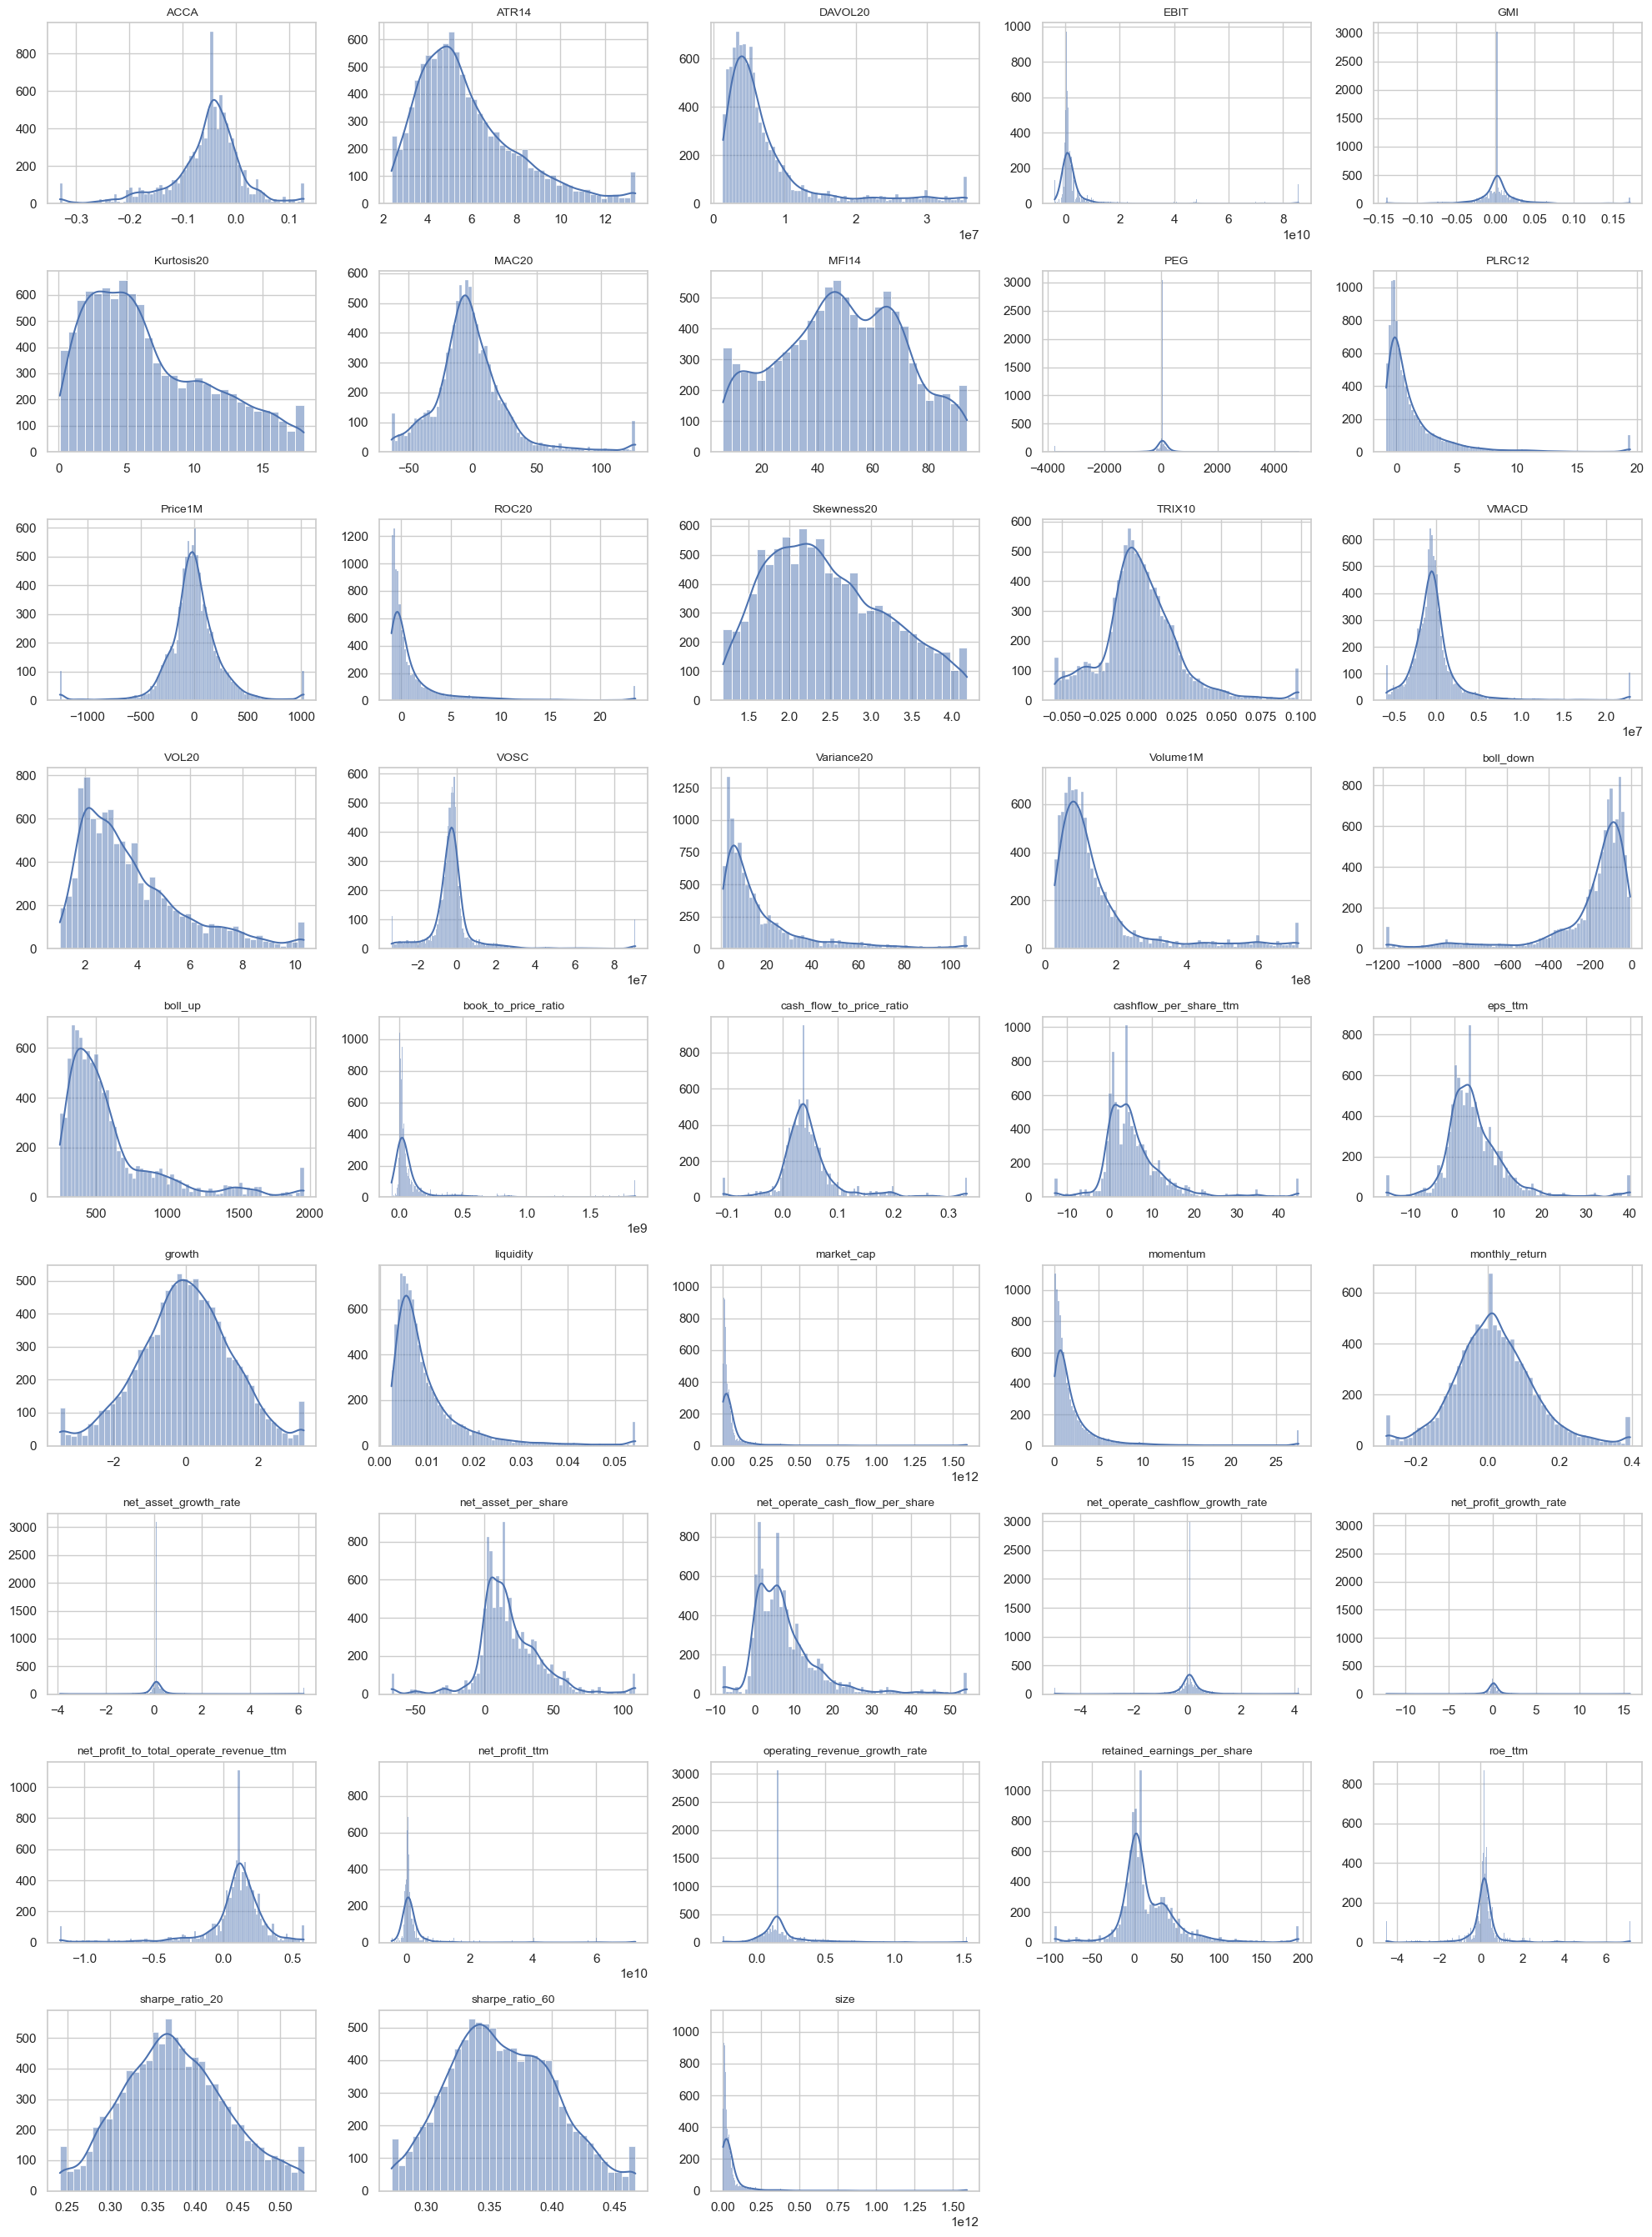

In [73]:
# It seems that many outliers are taking the same value and that might not fit well when we train,
# It doesn't really make sense just to abruptly fill any value with it's proxy, unless it is really asked for

# Set number of columns and compute rows
cols = 5
rows = math.ceil(len(factor_cols) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(factor_cols):
    sns.histplot(df_winsorized[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Visualization-Standardised

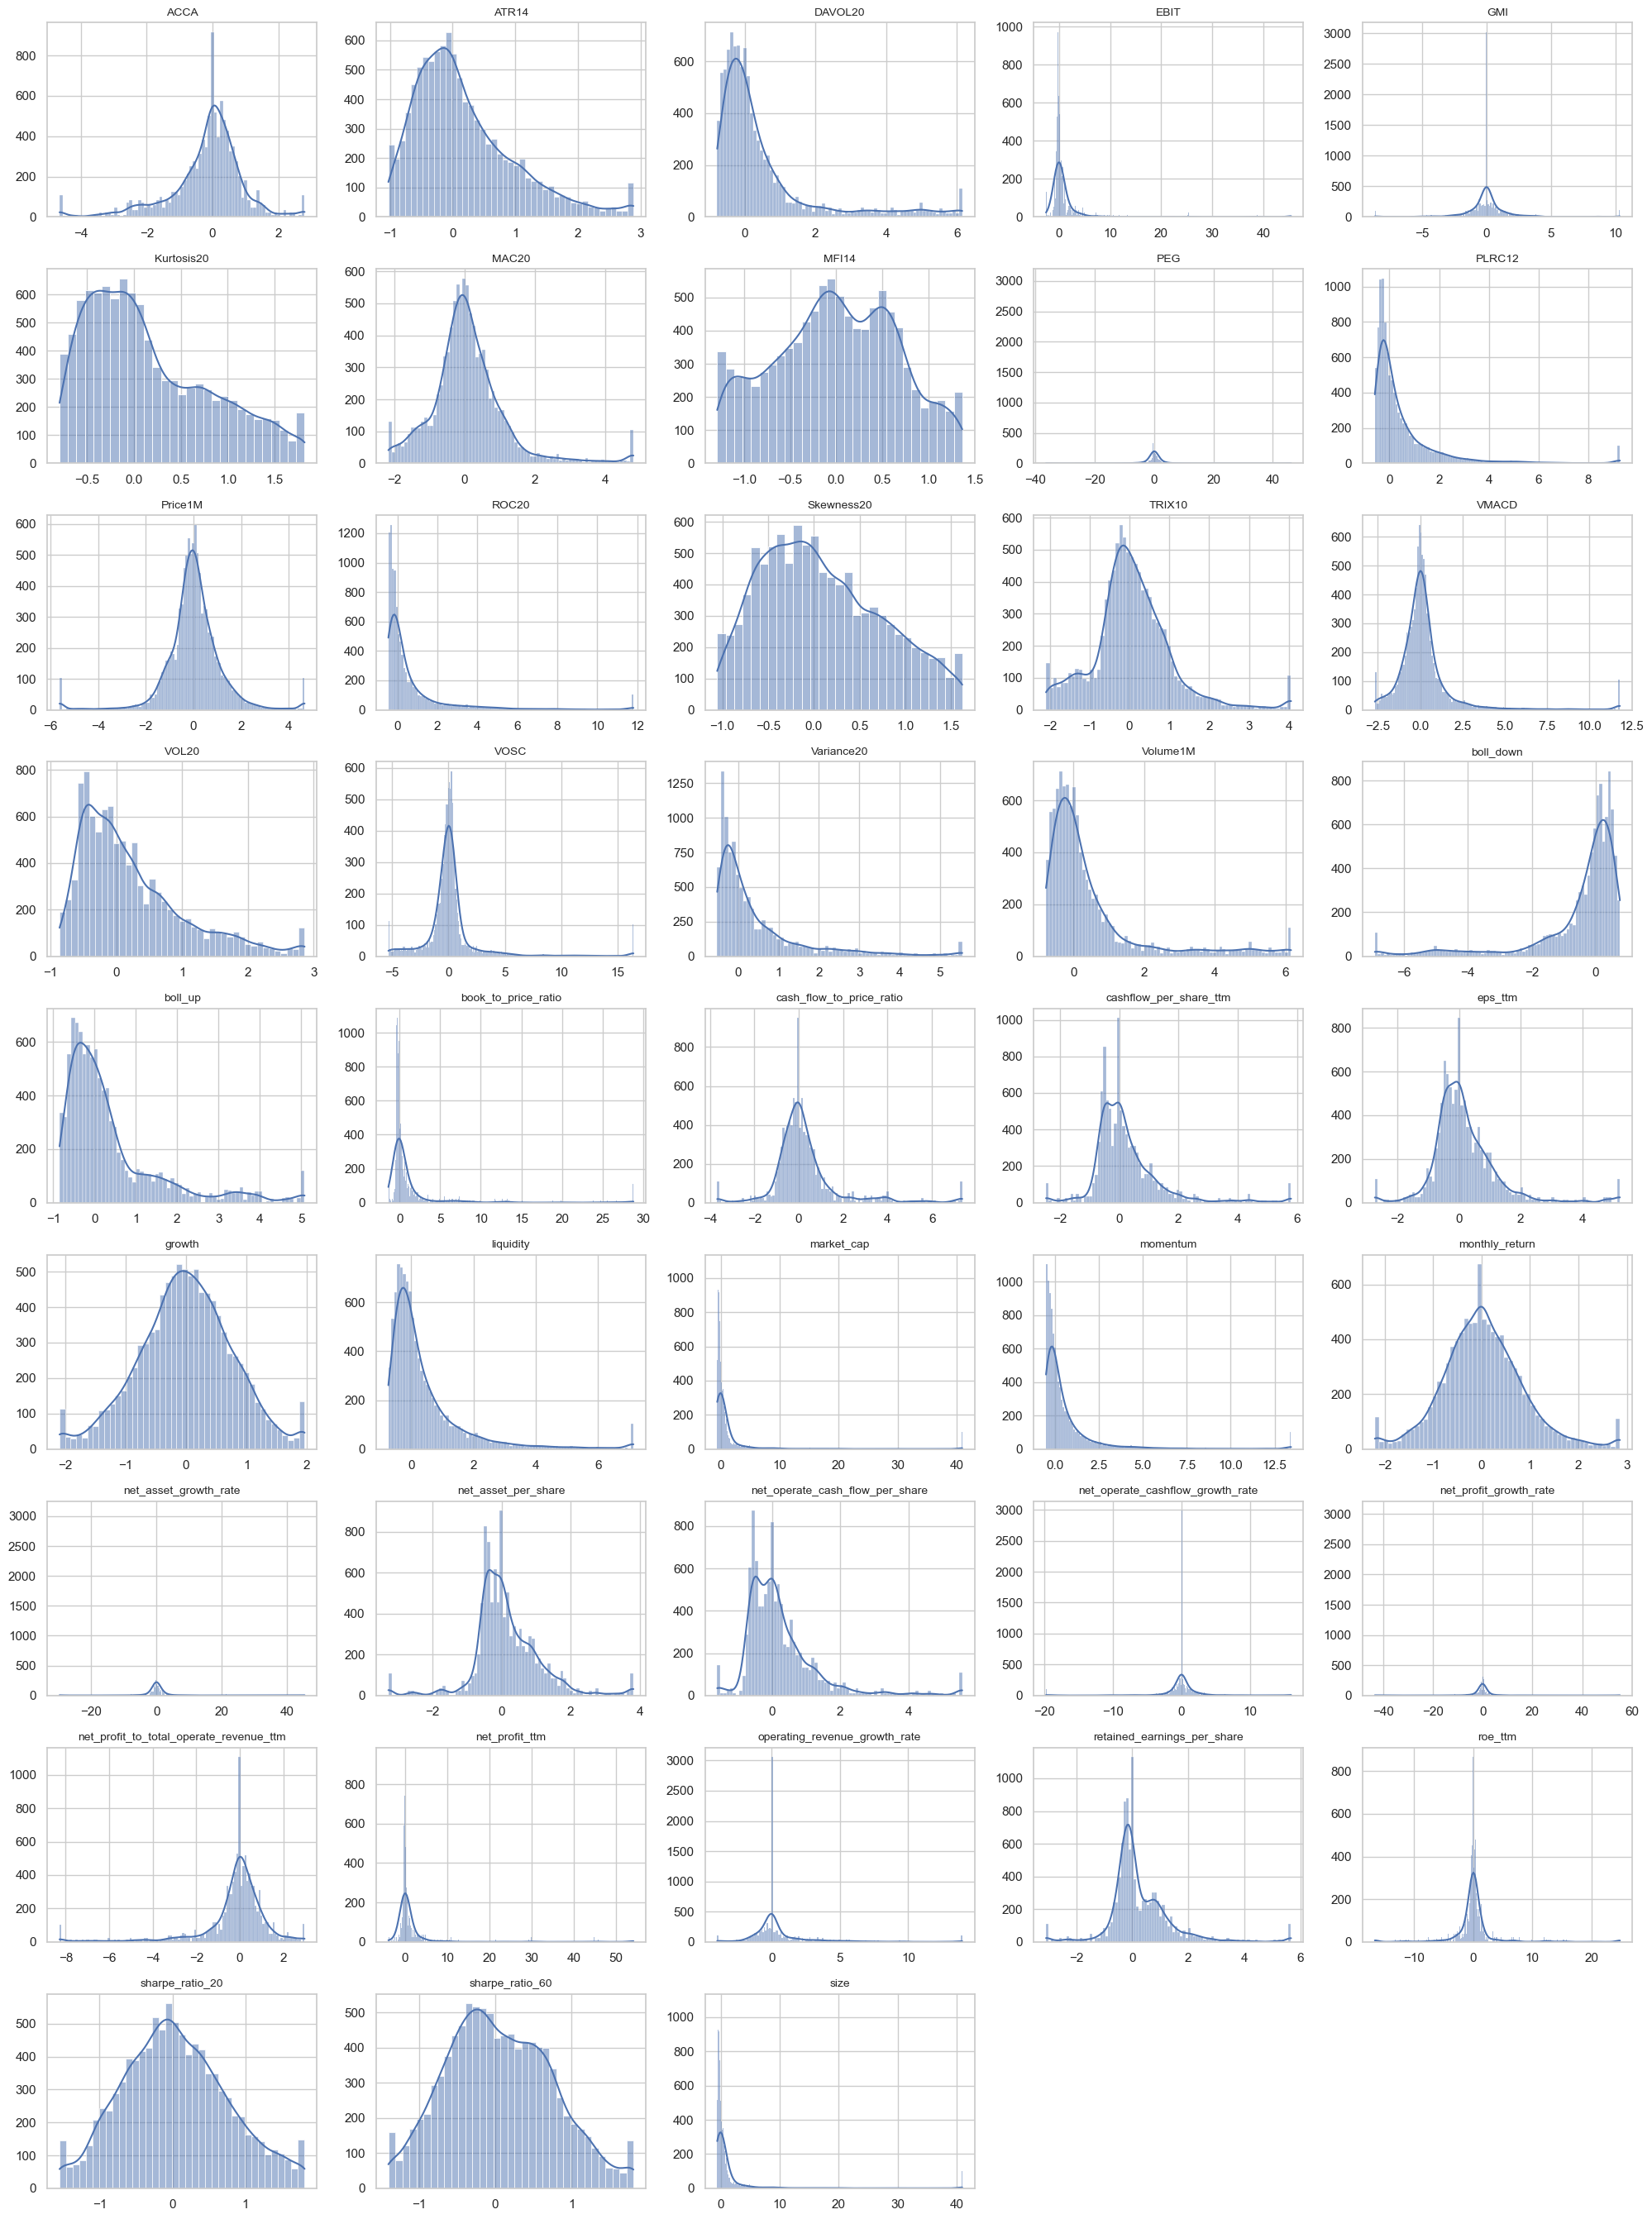

In [74]:

# without winsorization data almost all take the normal or any other distribution, which seem plausible.

# Set number of columns and compute rows
cols = 5
rows = math.ceil(len(factor_cols) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(factor_cols):
    sns.histplot(df_standardized[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Correlation 

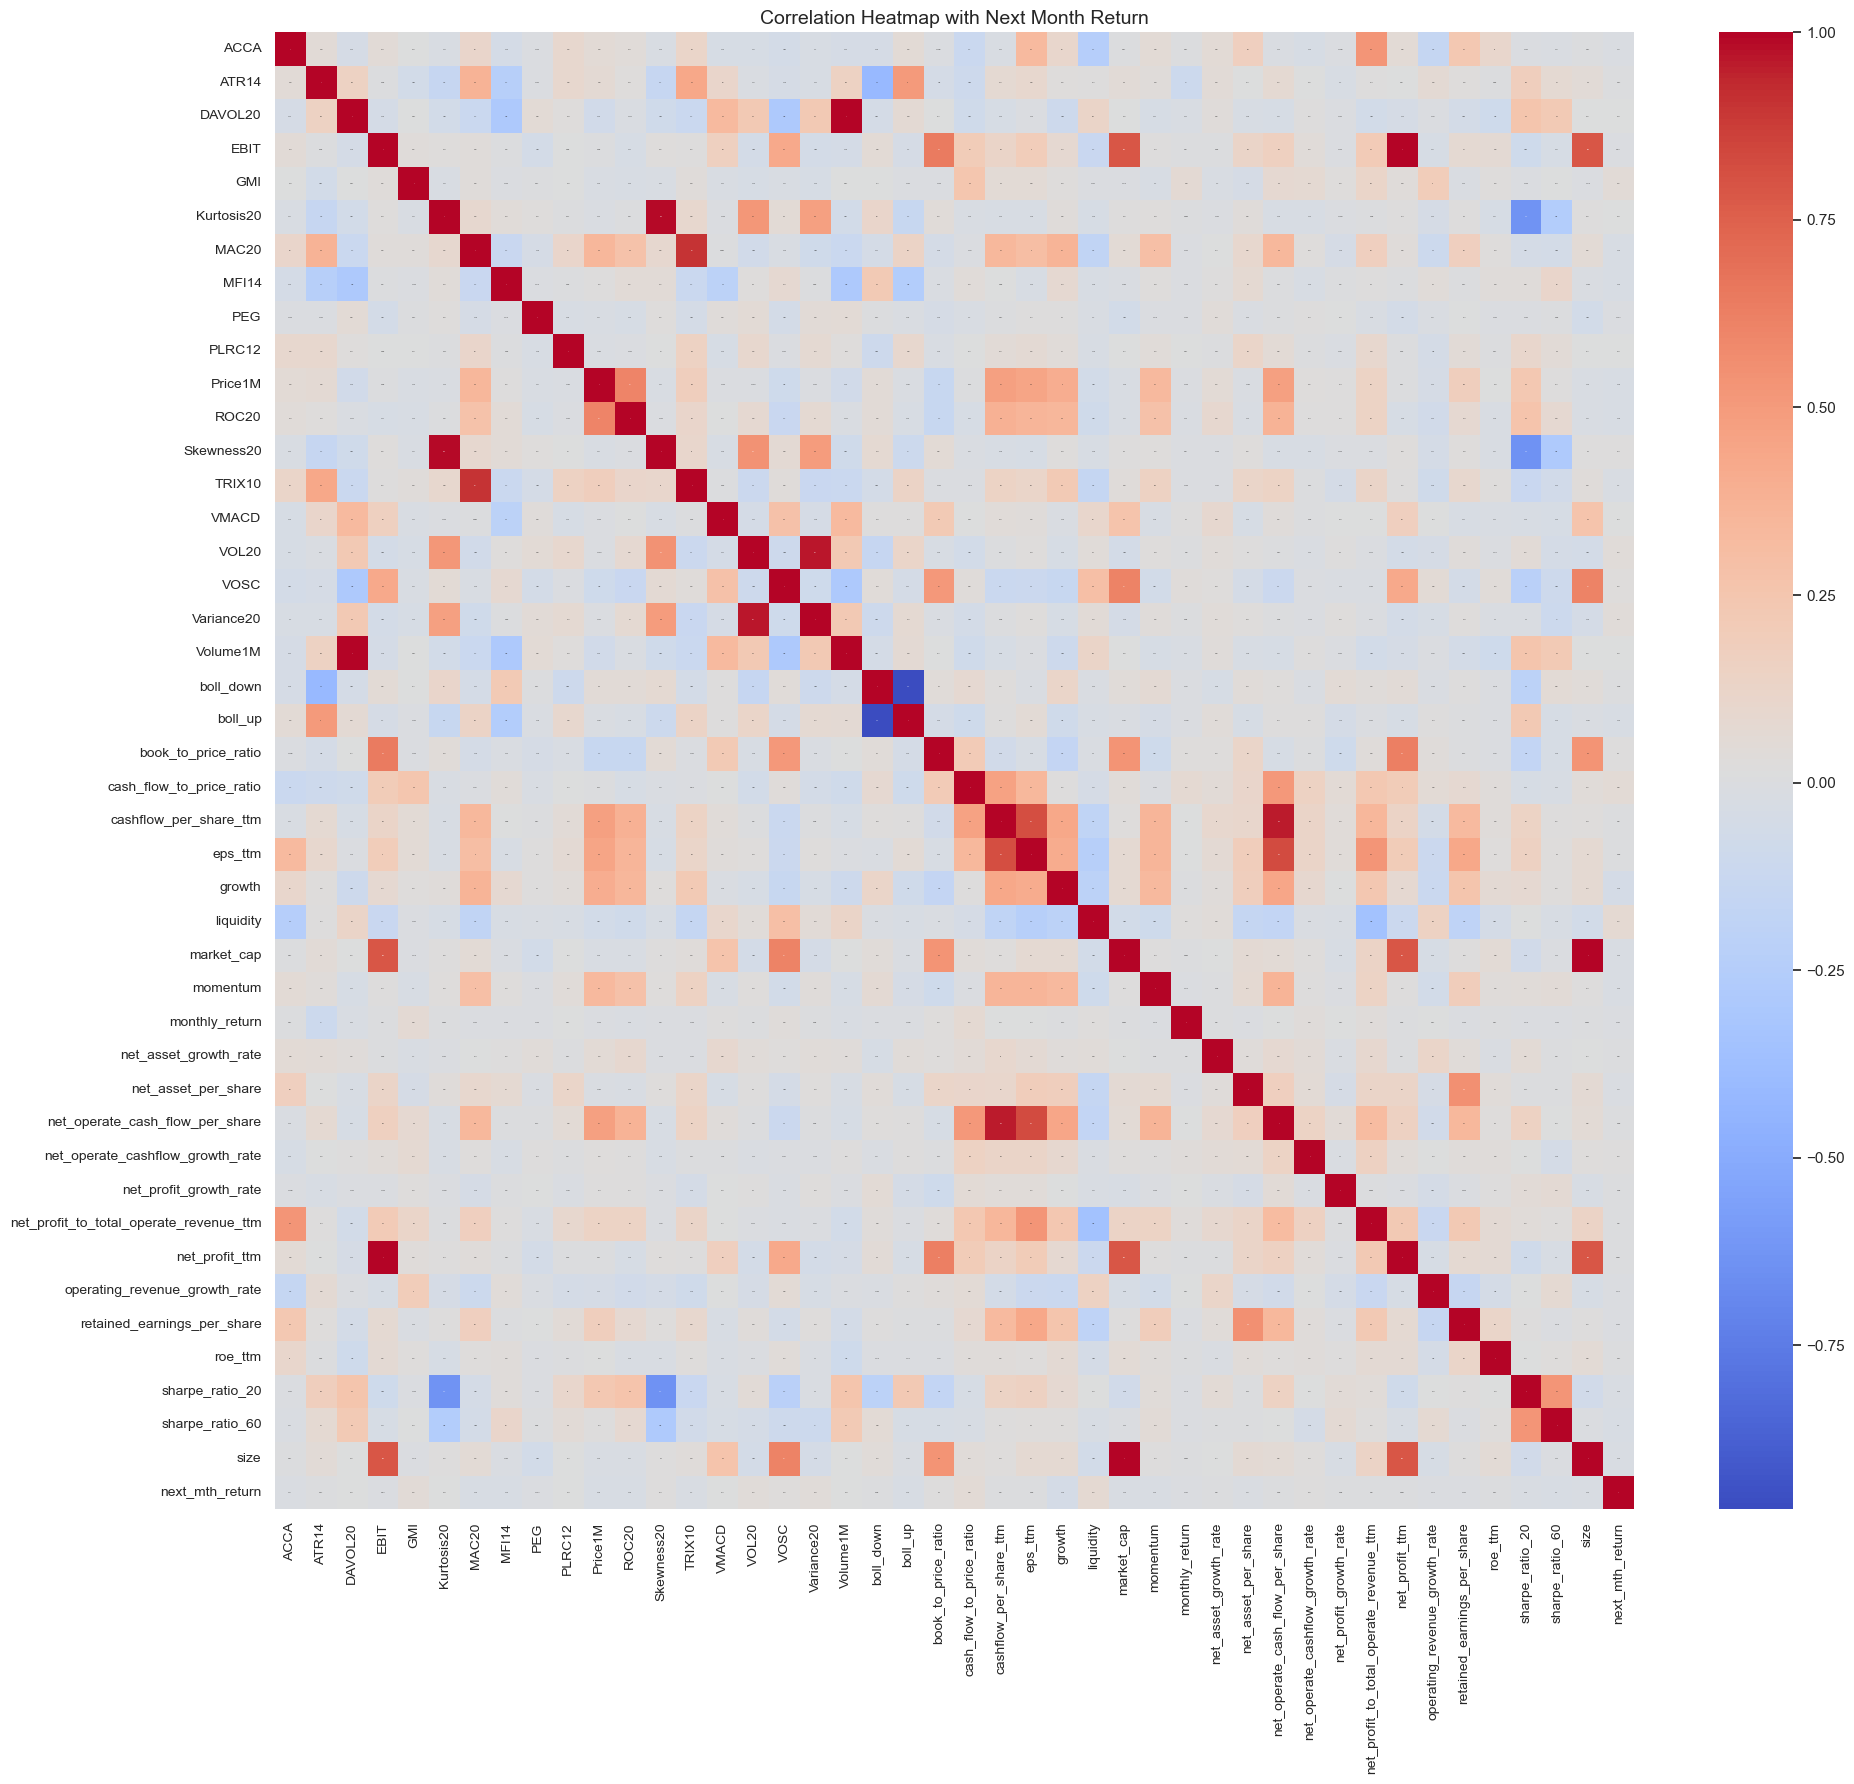

In [75]:
# Correlation heatmap with better font sizing
corr_cols = factor_cols + ['next_mth_return']
corr_matrix = df_standardized[corr_cols].corr()

plt.figure(figsize=(20, 18))  # More practical size
sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={"size": 1},  # Font size for annotations
    cmap='coolwarm',
    cbar=True,
    xticklabels=1,
    yticklabels=1
)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap with Next Month Return', fontsize=14)
plt.tight_layout()
plt.show()


In [78]:
# Compute the correlation matrix
corr_matrix = df_standardized[factor_cols+['next_mth_return']].corr()

# Extract upper triangle without the diagonal
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
filtered = corr_matrix.where(upper)

# Filter for values > 0.4
filtered_corr = filtered.stack().reset_index()
filtered_corr.columns = ['factor', 'Factor_2', 'Correlation']
strong_corr = filtered_corr[((abs(filtered_corr['Correlation']) > 0.4))]
strong_corr=strong_corr[(filtered_corr['Correlation'] < 1)]

strong_corr.sort_values(['Correlation'],ascending=False)

C:\Users\Preetham S Gowda\AppData\Local\Temp\ipykernel_32476\1748160050.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  strong_corr=strong_corr[(filtered_corr['Correlation'] < 1)]


,factor,Factor_2,Correlation
158,EBIT,net_profit_ttm,0.996889
211,Kurtosis20,Skewness20,0.989097
541,VOL20,Variance20,0.968731
744,cashflow_per_share_ttm,net_operate_cash_flow_per_share,0.961451
249,MAC20,TRIX10,0.905137
763,eps_ttm,net_operate_cash_flow_per_share,0.829893
736,cashflow_per_share_ttm,eps_ttm,0.820186
923,net_profit_ttm,size,0.791345
818,market_cap,net_profit_ttm,0.791345
149,EBIT,market_cap,0.790752


In [79]:
corr_matrix['next_mth_return'].abs().sort_values(ascending=False)

next_mth_return                            1.000000
liquidity                                  0.071048
cash_flow_to_price_ratio                   0.058960
GMI                                        0.051178
growth                                     0.048059
Variance20                                 0.044200
VOL20                                      0.041339
sharpe_ratio_60                            0.029816
Price1M                                    0.028269
ROC20                                      0.028123
VOSC                                       0.025778
MAC20                                      0.025379
boll_up                                    0.024788
MFI14                                      0.024524
net_operate_cashflow_growth_rate           0.022021
book_to_price_ratio                        0.019986
TRIX10                                     0.019605
Skewness20                                 0.017531
sharpe_ratio_20                            0.016333
momentum    

In [80]:
top_factors = corr_matrix['next_mth_return'].abs().sort_values(ascending=False).index[1:21] 
top_factors

Index(['liquidity', 'cash_flow_to_price_ratio', 'GMI', 'growth', 'Variance20',
       'VOL20', 'sharpe_ratio_60', 'Price1M', 'ROC20', 'VOSC', 'MAC20',
       'boll_up', 'MFI14', 'net_operate_cashflow_growth_rate',
       'book_to_price_ratio', 'TRIX10', 'Skewness20', 'sharpe_ratio_20',
       'momentum', 'market_cap'],
      dtype='object')

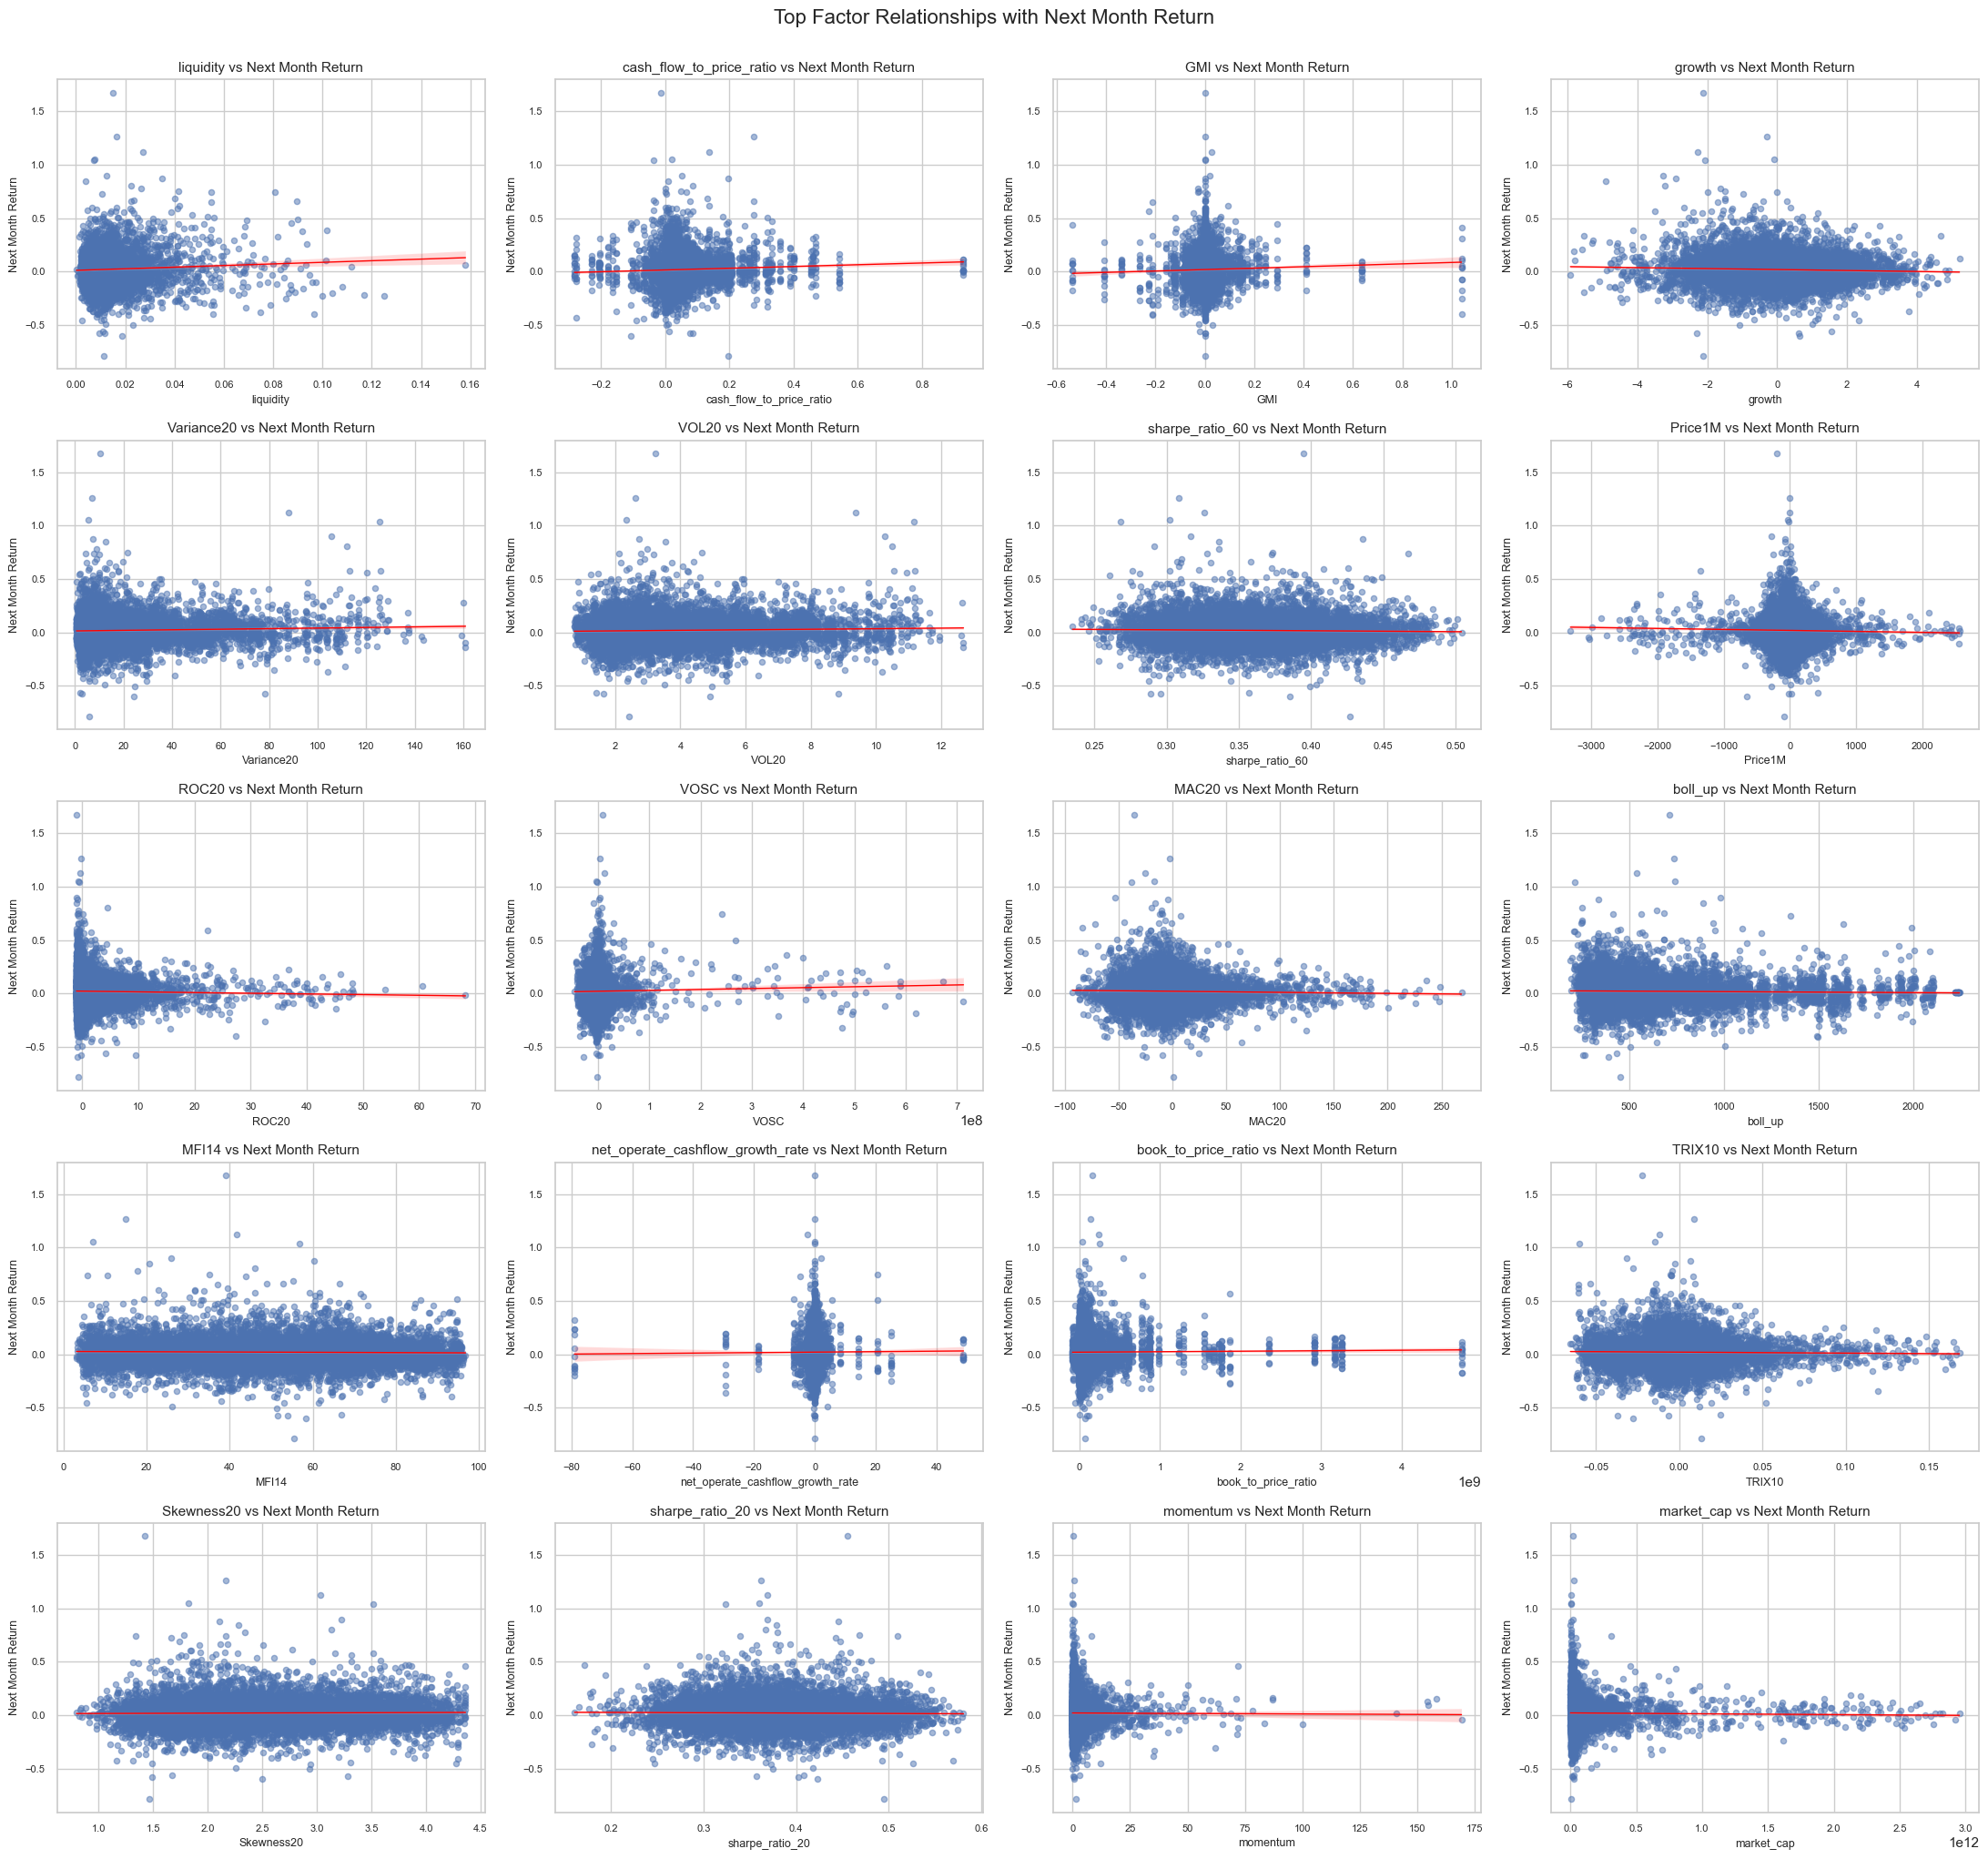

In [81]:
# Styling
sns.set(style='whitegrid', context='notebook', font_scale=1.0)

# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(22, 20))
axes = axes.flatten()

for i, factor in enumerate(top_factors):
    ax = axes[i]
    sns.regplot(
        data=df, x=factor, y='next_mth_return', 
        scatter_kws={'s': 20, 'alpha': 0.5}, 
        line_kws={'color': 'red', 'lw': 1}, 
        ax=ax
    )
    ax.set_title(f"{factor} vs Next Month Return", fontsize=11)
    ax.set_xlabel(factor, fontsize=9)
    ax.set_ylabel("Next Month Return", fontsize=9)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused axes if any
for j in range(len(top_factors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Top Factor Relationships with Next Month Return', fontsize=16, y=1.02)
plt.show()


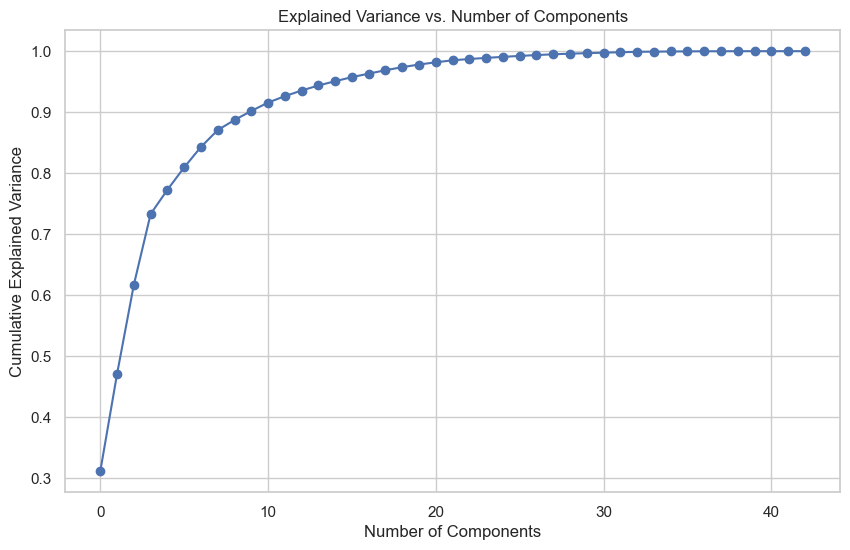

In [82]:
# there are outliers in the dataso i thought i will standardize the winsorized dataset and use it further
#  Standardize the factors
X_scaled = scaler.fit_transform(df_standardized[factor_cols])

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#  Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

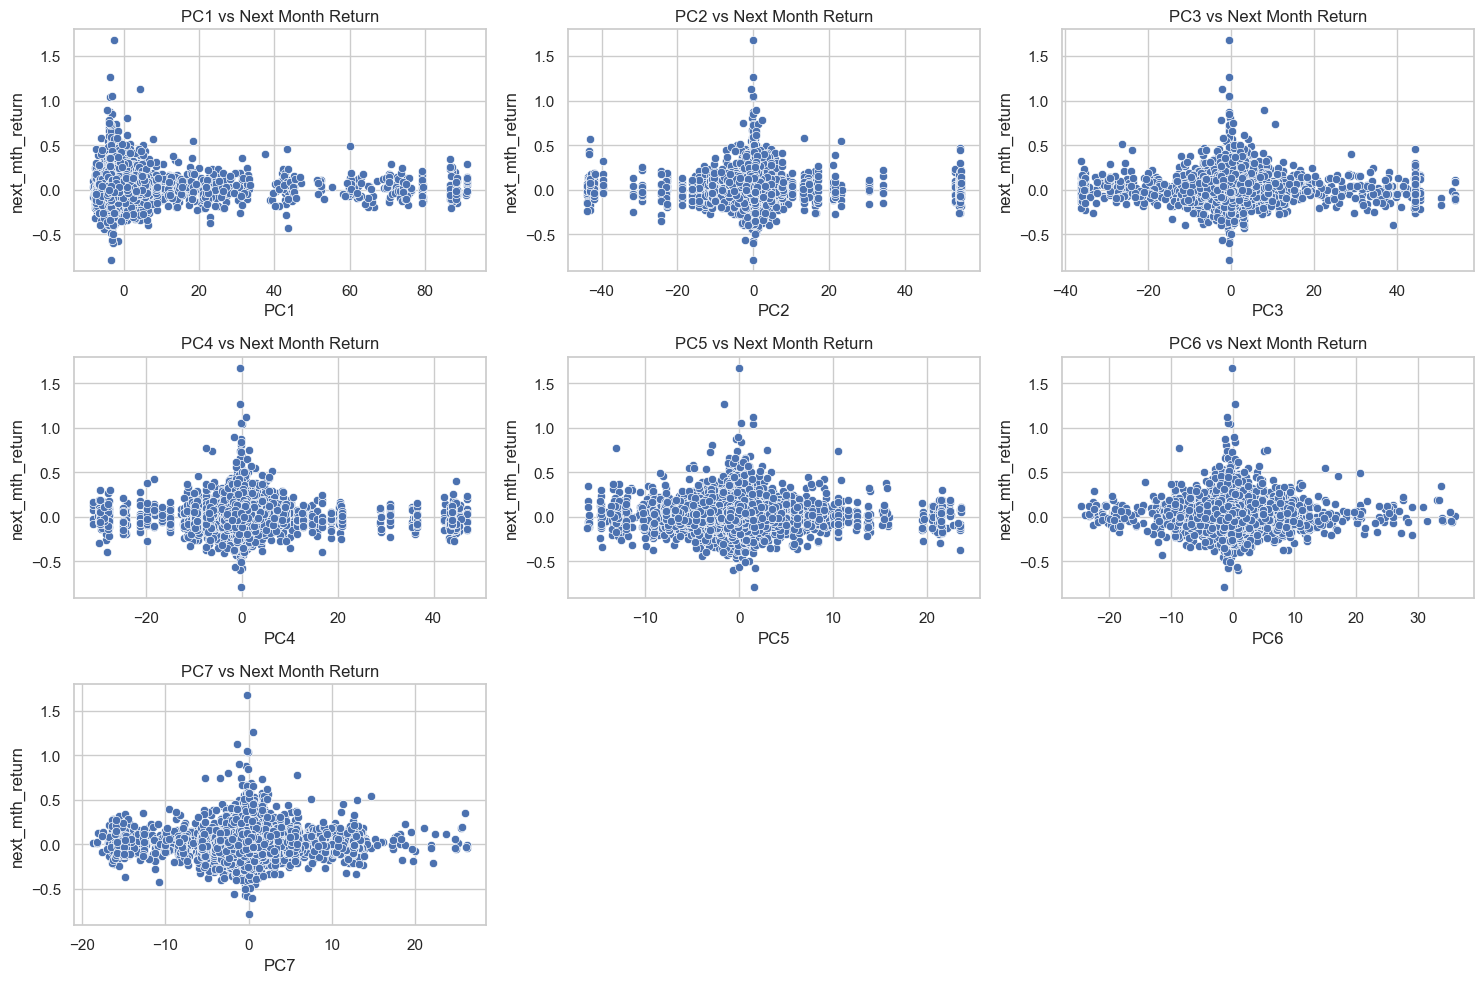

In [83]:
# Perform PCA to reduce the data to 7 components
pca = PCA(n_components=7)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the 7 principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(7)])

# Add the target variable to the DataFrame
pca_df['next_mth_return'] = df['next_mth_return']

# Plot each principal component vs next_mth_return
plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=pca_df[f'PC{i+1}'], y=pca_df['next_mth_return'])
    plt.title(f'PC{i+1} vs Next Month Return')

plt.tight_layout()
plt.show()

The PCA implementation although showed us extremely good result, it is too good to be true, the above saturation to one is due to the presence of outliers, as there are outliers and according to me they should not be blindly replace, hence I stuck to the normal standardization technique

In [ ]:
# rewrote df_stndardised
df_standardized = df.copy()
scaler = RobustScaler()
if factor_cols:
    df_standardized[factor_cols] = scaler.fit_transform(df_standardized[factor_cols])

# Target Engineering

In [30]:
(df_standardized['next_mth_return'].isna()).sum()/len(df_standardized)
# Less than 2% of Null values

0.021450663474009778

In [33]:
df_standardized['next_mth_return'].mean()

0.019784576636928456

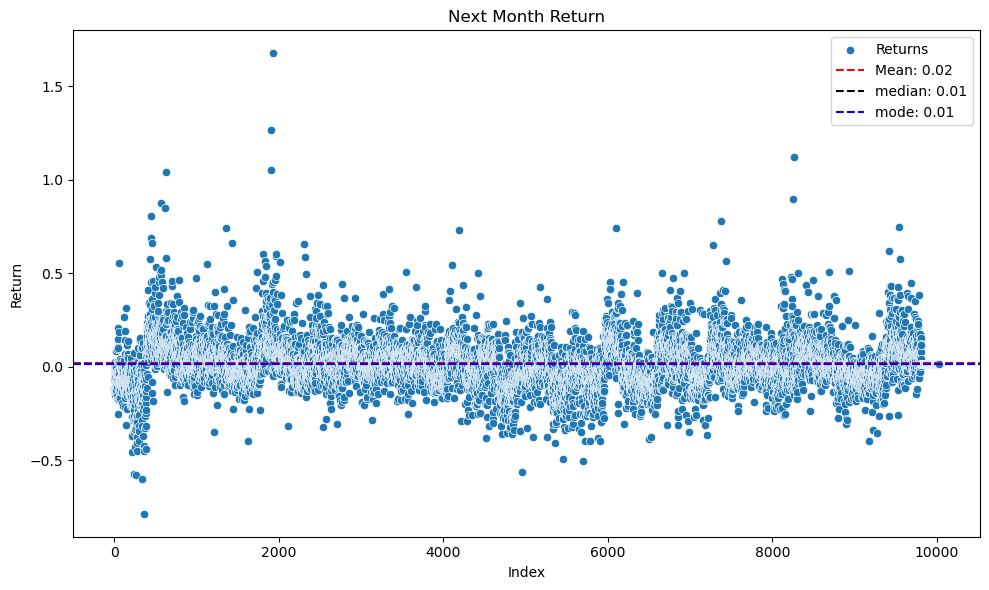

In [48]:
plt.figure(figsize=(10, 6))

# Plotting the scatter of next month returns
sns.scatterplot(x=range(len(df_standardized)), y='next_mth_return', data=df_standardized, label='Returns')

# Adding a horizontal line for mean return
mean_return = df_standardized['next_mth_return'].mean()
plt.axhline(y=mean_return, color='red', linestyle='--', label=f'Mean: {mean_return:.2f}')

# Adding a horizontal line for median return
median_return = df_standardized['next_mth_return'].median()
plt.axhline(y=median_return, color='black', linestyle='--', label=f'median: {median_return:.2f}')

# Adding a horizontal line for median return
mode_return = df_standardized['next_mth_return'].mode().values[0]
plt.axhline(y=mode_return, color='blue', linestyle='--', label=f'mode: {mode_return:.2f}')

plt.title('Next Month Return')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
print(df_standardized['next_mth_return'].median())
print(df_standardized['next_mth_return'].mean())
#  Lets take a conservtive approach and fill them with median

0.01352656951464935
0.019784576636928456


In [36]:
df_standardized['next_mth_return']=df_standardized['next_mth_return'].fillna(df_standardized['next_mth_return'].median())

In [49]:
def classify_return(x):
    if x > 0.10:
        return 5
    elif 0.05 < x <= 0.10:
        return 4
    elif 0 <= x <= 0.05:
        return 3
    elif -0.10 <= x < 0:
        return 2
    else:
        return 1

df_standardized['target'] = df_standardized['next_mth_return'].apply(classify_return)


In [50]:
#  Good Balance in the target
df_standardized['target'].value_counts()

target
2    3149
3    2073
5    2049
4    1505
1    1247
Name: count, dtype: int64